In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Problema 1: Series de Taylor

a) para la serie sen(x)

In [2]:
def sin(theta, tol= 1e-10):
    '''
    Calcula el valor del sen(theta) con una exactitud cercana a la tolerancia ingresada usando la serie de Tylor para el sen(x)

    Parametro:

    theta: angulo 
    tol: tolerancia, por defecto en 1e-10

    Devuelve:

    valor se seno calculado
    error relativo
    error porcentual
    terminos de la serie requeridos
    sucesion de sumas parciales
    '''
    # Guarda el valor real del seno
    seno = np.sin(theta)
    
    # Define la variable que va a guardar la suma, el contador, y el termino anterior para compararlo con su lista
    suma = 0
    n = 0
    terminoAnt = 0
    sumParciales = [suma]

    # Desarrollo de la serie
    while True:
        termino = ((-1)**n / factorial(2*n + 1)) * theta**(2*n + 1)
        suma += termino
        sumParciales.append(suma)

        if abs(termino - terminoAnt) < tol:
            break
        
        n += 1
    
    # Evaluacion del error
    errAbs = abs(suma - seno)
    errRel = errAbs / seno
    errPor = str(errRel * 100) + ' %'

    return suma, errRel, errPor, n+1, sumParciales

El valor calculado es: 0.7071067811865679.
Con un error relativo de: 2.873269199391308e-14.
Con un error porcentual de: 2.873269199391308e-12 %.
Y en 7 terminos


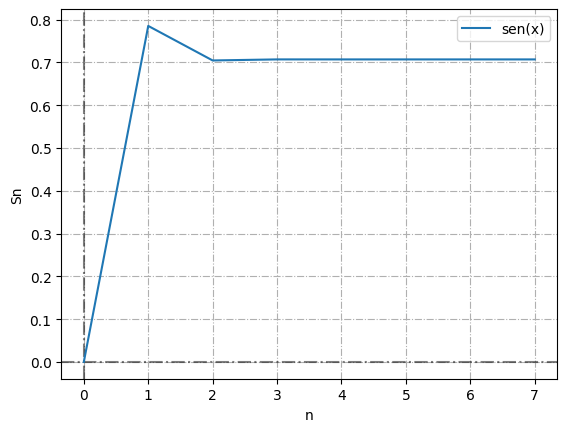

In [3]:
theta = np.pi/4
sen, errRelativo, errPorcentual, terminos, sucesion = sin(theta)

print(f"El valor calculado es: {sen}.\nCon un error relativo de: {errRelativo}.\nCon un error porcentual de: {errPorcentual}.\nY en {terminos} terminos")

plt.axhline(0.0, color='black', alpha=0.5, linestyle='-.')
plt.axvline(0.0, color='black', alpha=0.5, linestyle='-.')

plt.plot(sucesion, label= 'sen(x)')

plt.grid(linestyle='-.')
plt.xlabel('n')
plt.ylabel('Sn')
plt.legend()


b) Para la serie de ln(1+x)

In [4]:
def ln(x, tol=1e-10):
    '''
    Calcula el logaritmo natural de 1 + x para x ingresado por el usuario con una exactitud sercana a la tolerancia ingresada usando
    su serie de tylor

    Entradas:

    x: valor de x
    tol: tolerancia, por defecto en 1e-10

    Devuelve:

    valor calculado
    error relativo
    error porcentual
    terminos de la serie requeridos
    '''
    # Define el valor real
    valor = np.log(1 + x)

    # Define la variable donde se va a guardar la sumatoria, el contador, y donde se va a guardar los terminos anteriores para comparar
    suma = 0
    n = 1
    terminoAnt = 0
    sumParciales = []

    # Desarrollo de la serie
    while True:
        termino = ((-1)**(n-1) / n) * x**n
        suma += termino
        sumParciales.append(suma)

        if abs(termino - terminoAnt) < tol: 
            break

        n += 1
    
    # Evaluacion del error
    errAbs = abs(suma - valor)
    errRel = errAbs / valor
    errPor = str(errRel * 100) + ' %'
    
    return suma, errRel, errPor, n, sumParciales

El valor calculado es: 0.5796380016600627.
Con un error relativo de: 5.950961667662422e-06.
Con un error porcentual de: 0.0005950961667662422 %.
Y en 34 terminos


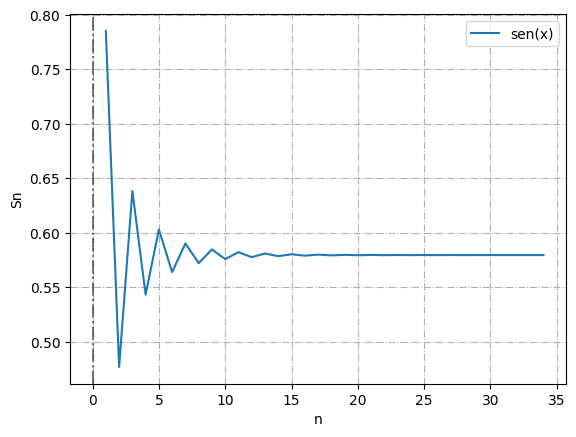

In [5]:
x = np.pi/4
ln, errRelativo, errPorcentual, terminos, sucesion = ln(x, 1e-5)

print(f"El valor calculado es: {ln}.\nCon un error relativo de: {errRelativo}.\nCon un error porcentual de: {errPorcentual}.\nY en {terminos} terminos")

plt.axvline(0.0, color='black', alpha=0.5, linestyle='-.')

plt.plot(np.arange(1, terminos+1),sucesion, label= 'sen(x)')

plt.grid(linestyle='-.')
plt.xlabel('n')
plt.ylabel('Sn')
plt.legend()

# Problema 2: serie binomial

In [6]:
'''Como el coeficiente binomial requiere del uso del factorial y este esta definido solo para numeros enteros, desarrollamos el coeficiente
usando la funcion gamma'''
from scipy.special import gamma

In [7]:
# Se define la funcion del coeficiente binomial
C = lambda n, k: gamma(n+1) / (gamma(k+1)*gamma(n-k+1)) 


In [8]:
def serieBin(x, α, iter= 1000, tol= 1e-5, evTol= False):
    '''
    Calcula el valor para la serie binomial con α y x ingresado por el usuario en las iteraciones indicadas o, en caso de evTol= True,
    la tolerancia indicada

    Entradas:

    x: valor x a evalua
    α: potencia de la serie
    iter: cantidad de iteraciones maximas, por defecto en 100
    tol: tolerancia, por defecto en 1e-5
    evTol: bandera para activar la tolerancia, por defento en False

    Entrega:
    '''
    # Se definen variables necesarias
    valor = (1 + x)**α

    # Se define la variable que va a guardar la suma, el contador, y el termino anterior para compararlo, y la lista de sumas parciales
    suma = 0
    terminoAnt = 0
    sumParciales = []

    # Desarrollo de la serie
    for n in range(iter):
        termino = C(α, n) * x**n
        suma += termino
        sumParciales.append(suma)

        if evTol and abs(termino - terminoAnt) < tol:
            # Evaluacion del error
            errAbs = abs(suma - valor)
            errRel = errAbs / valor
            errPor = str(errRel * 100) + ' %'
    
            return suma, errRel, errPor, n+1, sumParciales
    
    if evTol:
        raise RuntimeError('Maximo de iteraciones alcanzado')

    # Evaluacion del error
    errAbs = abs(suma - valor)
    errRel = errAbs / valor
    errPor = str(errRel * 100) + ' %'
    
    return suma, errRel, errPor, n+1, sumParciales
    


al incluir 5 terminos en la suma se llego como resultado a: 1.22412109375
con un errorRelativo de: 0.0005093123116165306 y porcentual de: 0.05093123116165306 %

al incluir 10 terminos en la suma se llego como resultado a: 1.224751204252243
con un errorRelativo de: 5.170759071565455e-06 y porcentual de: 0.0005170759071565455 %

al incluir 20 terminos en la suma se llego como resultado a: 1.224744873486003
con un errorRelativo de: 1.7100818501116435e-09 y porcentual de: 1.7100818501116435e-07 %

al incluir 40 terminos en la suma se llego como resultado a: 1.22474487139159
con un errorRelativo de: 9.06493303673679e-16 y porcentual de: 9.06493303673679e-14 %



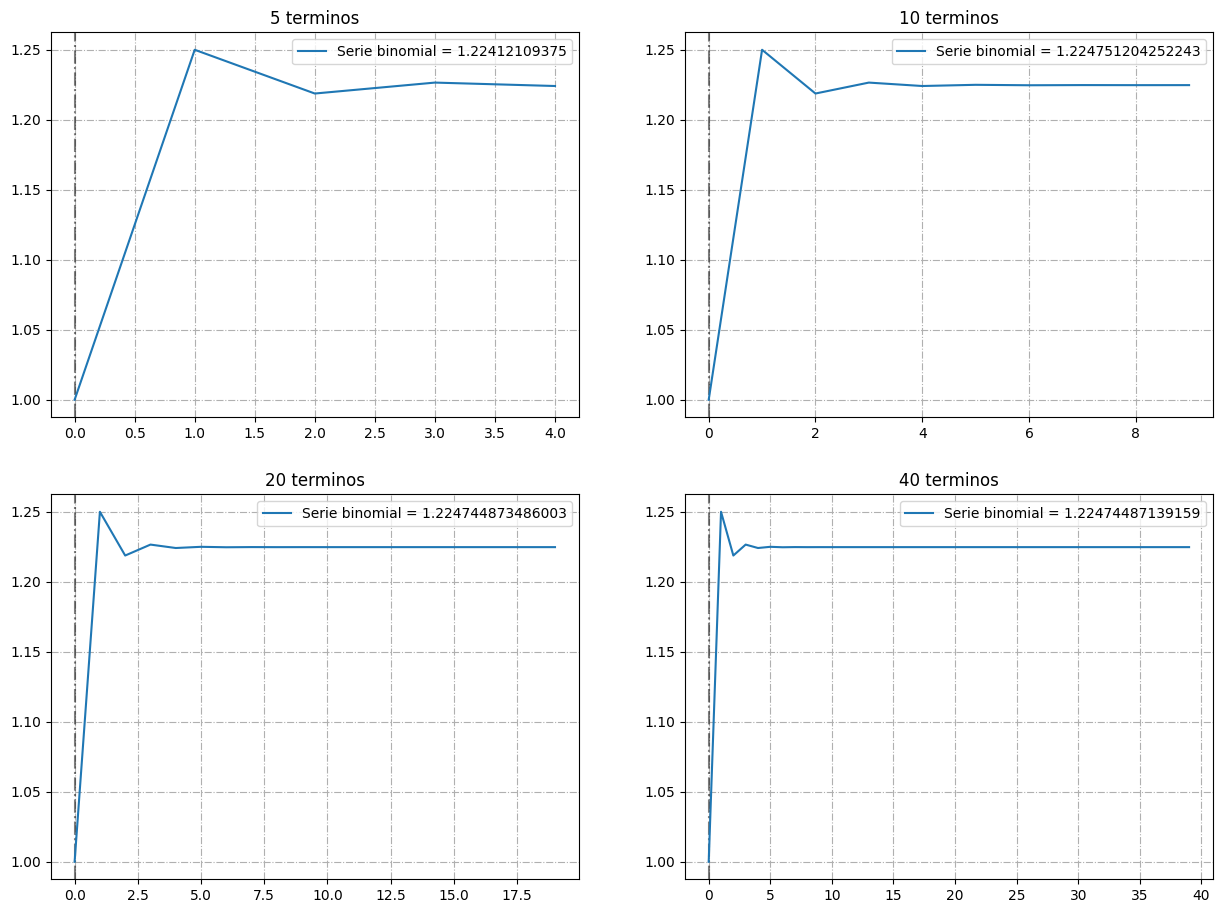

In [9]:
serie1, errRelativo1, errPorcentual1, terminos1, sucesion1 = serieBin(0.5, 1/2, 5)
serie2, errRelativo2, errPorcentual2, terminos2, sucesion2 = serieBin(0.5, 1/2, 10)
serie3, errRelativo3, errPorcentual3, terminos3, sucesion3 = serieBin(0.5, 1/2, 20)
serie4, errRelativo4, errPorcentual4, terminos4, sucesion4 = serieBin(0.5, 1/2, 40)

print(f'al incluir {terminos1} terminos en la suma se llego como resultado a: {serie1}\ncon un errorRelativo de: {errRelativo1} y porcentual de: {errPorcentual1}\n')
print(f'al incluir {terminos2} terminos en la suma se llego como resultado a: {serie2}\ncon un errorRelativo de: {errRelativo2} y porcentual de: {errPorcentual2}\n')
print(f'al incluir {terminos3} terminos en la suma se llego como resultado a: {serie3}\ncon un errorRelativo de: {errRelativo3} y porcentual de: {errPorcentual3}\n')
print(f'al incluir {terminos4} terminos en la suma se llego como resultado a: {serie4}\ncon un errorRelativo de: {errRelativo4} y porcentual de: {errPorcentual4}\n')

fig, axs = plt.subplots(2, 2, figsize= (15, 11))

'''---------------------------------------------axs[0,0]---------------------------------------------'''
axs[0,0].axvline(0.0, color='black', alpha= 0.5, linestyle= '-.')

axs[0,0].plot(sucesion1, label= f'Serie binomial = {serie1}')

axs[0,0].set_title(f'{terminos1} terminos')
axs[0,0].grid(linestyle= '-.')
axs[0,0].legend()

'''---------------------------------------------axs[0,1]---------------------------------------------'''
axs[0,1].axvline(0.0, color='black', alpha= 0.5, linestyle= '-.')

axs[0,1].plot(sucesion2, label= f'Serie binomial = {serie2}')

axs[0,1].set_title(f'{terminos2} terminos')
axs[0,1].grid(linestyle= '-.')
axs[0,1].legend()

'''---------------------------------------------axs[1,0]---------------------------------------------'''
axs[1,0].axvline(0.0, color='black', alpha= 0.5, linestyle= '-.')

axs[1,0].plot(sucesion3, label= f'Serie binomial = {serie3}')

axs[1,0].set_title(f'{terminos3} terminos')
axs[1,0].grid(linestyle= '-.')
axs[1,0].legend()

'''---------------------------------------------axs[1,1]---------------------------------------------'''
axs[1,1].axvline(0.0, color='black', alpha= 0.5, linestyle= '-.')

axs[1,1].plot(sucesion4, label= f'Serie binomial = {serie4}')

axs[1,1].set_title(f'{terminos4} terminos')
axs[1,1].grid(linestyle= '-.')
axs[1,1].legend()

Se puede concluir que la serie converge rapido al valor buscado, se requieren pocas iteraciones para una buena aproximacion

d)

Para un error de 0.01, la serie converge a 1.2265625 en 4 terminos
con un error relativo de 0.0014840875441640507 y porcentual de 0.14840875441640505 %

Para un error de 0.001, la serie converge a 1.2249755859375 en 6 terminos
con un error relativo de 0.00018837763790667284 y porcentual de 0.018837763790667286 %

Para un error de 0.0001, la serie converge a 1.2247298955917358 en 9 terminos
con un error relativo de 1.2227689376714766e-05 y porcentual de 0.0012227689376714767 %

Para un error de 1e-05, la serie converge a 1.2247421480715275 en 11 terminos
con un error relativo de 2.223581518953639e-06 y porcentual de 0.0002223581518953639 %

Para un error de 1e-06, la serie converge a 1.2247451045404887 en 14 terminos
con un error relativo de 1.903652794864201e-07 y porcentual de 1.903652794864201e-05 %

Para un error de 1e-07, la serie converge a 1.224744849846978 en 17 terminos
con un error relativo de 1.7591101205965485e-08 y porcentual de 1.7591101205965485e-06 %



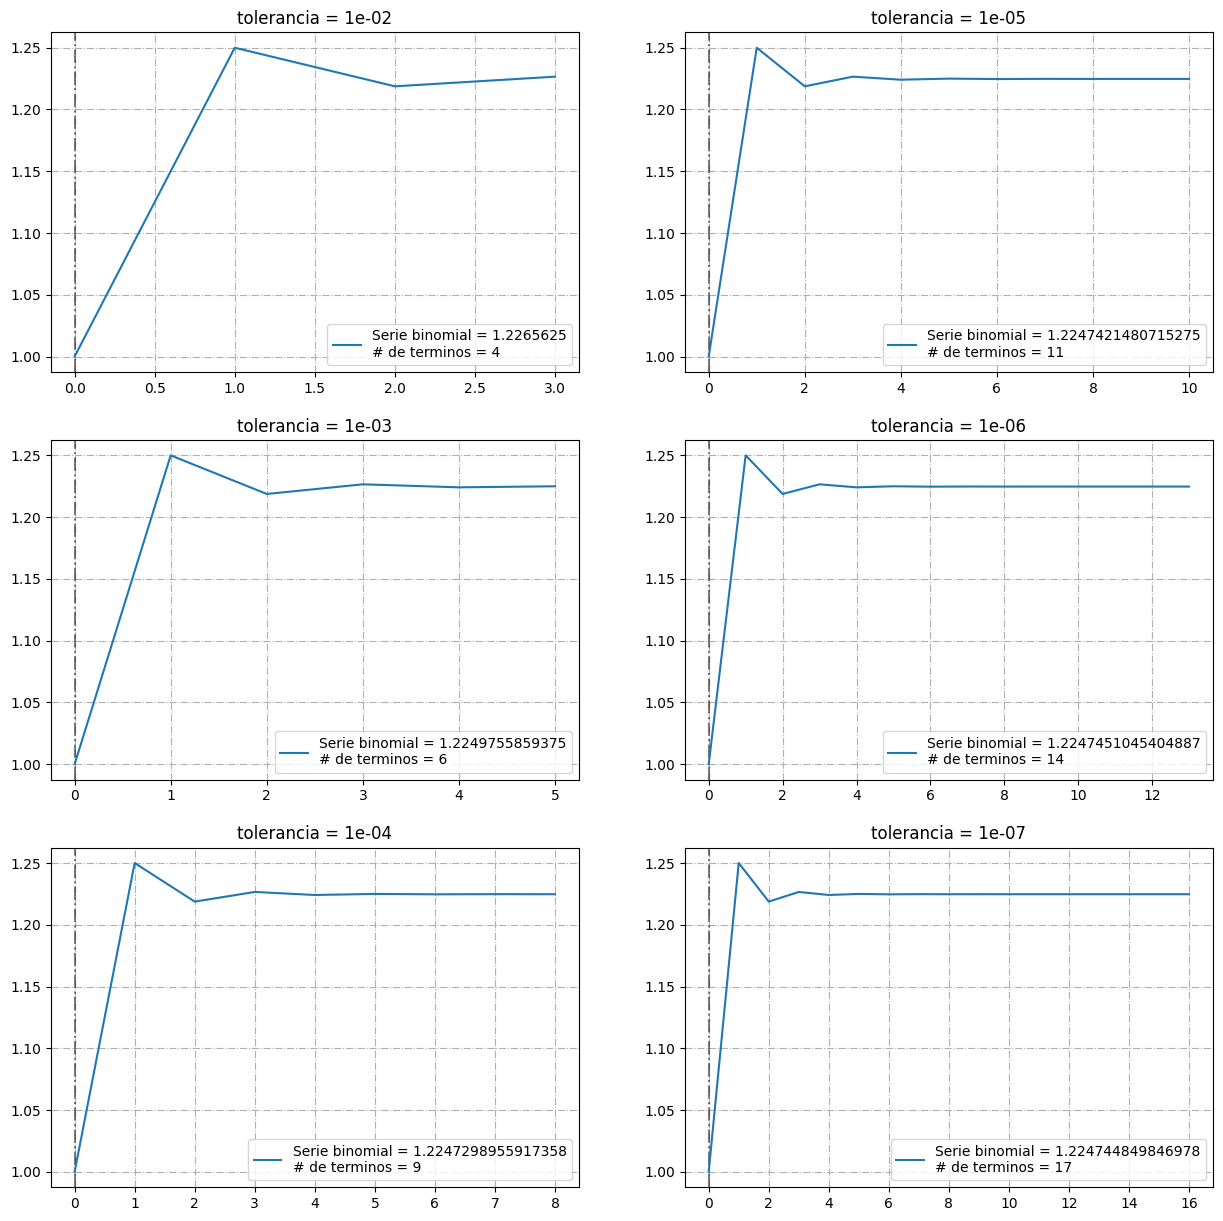

In [10]:
fig, axs= plt.subplots(3, 2, figsize= (15,15))

for i in range(6):
    tol = 1e-2/(10**(i))
    serie1, errRelativo1, errPorcentual1, terminos1, sucesion1 = serieBin(0.5, 1/2, evTol=True, tol=tol)

    print(f'Para un error de {tol}, la serie converge a {serie1} en {terminos1} terminos\ncon un error relativo de {errRelativo1} y porcentual de {errPorcentual1}\n')
    
    if i < 3:
        axs[i,0].axvline(0.0, color='black', alpha= 0.5, linestyle= '-.')

        axs[i,0].plot(sucesion1, label= f'Serie binomial = {serie1}\n# de terminos = {terminos1}')

        axs[i,0].set_title(f'tolerancia = {tol:.0e}')
        axs[i,0].grid(linestyle= '-.')
        axs[i,0].legend()
    else:
        axs[i-3,1].axvline(0.0, color='black', alpha= 0.5, linestyle= '-.')

        axs[i-3,1].plot(sucesion1, label= f'Serie binomial = {serie1}\n# de terminos = {terminos1}')

        axs[i-3,1].set_title(f'tolerancia = {tol}')
        axs[i-3,1].grid(linestyle= '-.')
        axs[i-3,1].legend()